In [1]:
# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys

# Adicionar src ao path
sys.path.append(str(Path.cwd().parent / 'src'))
from data.load_data import load_raw_data, get_data_info

# Configuração de visualização
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline

In [3]:
# 2. Carregar dados
df = load_raw_data("/workspaces/churn-prediction-mlops/data/raw/Telco-Customer-Churn.csv")
info = get_data_info(df)
print(info)

✅ Dados carregados: 7043 linhas, 21 colunas
{'n_rows': 7043, 'n_cols': 21, 'missing_values': 0, 'duplicates': 0, 'memory_usage_mb': 6.820952415466309}


In [4]:
# 3. Primeiras linahs
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# 4. Informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# 5. Estatísticas 
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
# 6. Missing values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(f"Colunas com valores missing:\n{missing}")

Colunas com valores missing:
Series([], dtype: int64)


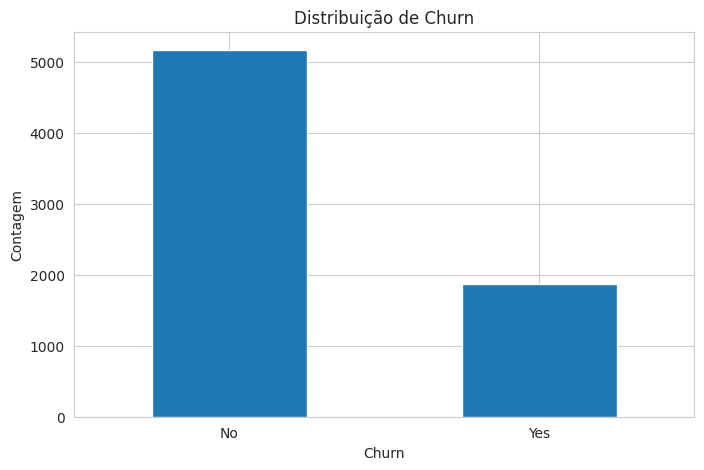


📊 Taxa de Churn: 26.54%


In [8]:
# 7. Distribuição de variável target
plt.figure(figsize=(8, 5))
df['Churn'].value_counts().plot(kind='bar')
plt.title('Distribuição de Churn')
plt.xlabel('Churn')
plt.ylabel('Contagem')
plt.xticks(rotation=0)
plt.show()

churn_rate = df['Churn'].value_counts(normalize=True)
print(f"\n📊 Taxa de Churn: {churn_rate['Yes']:.2%}")

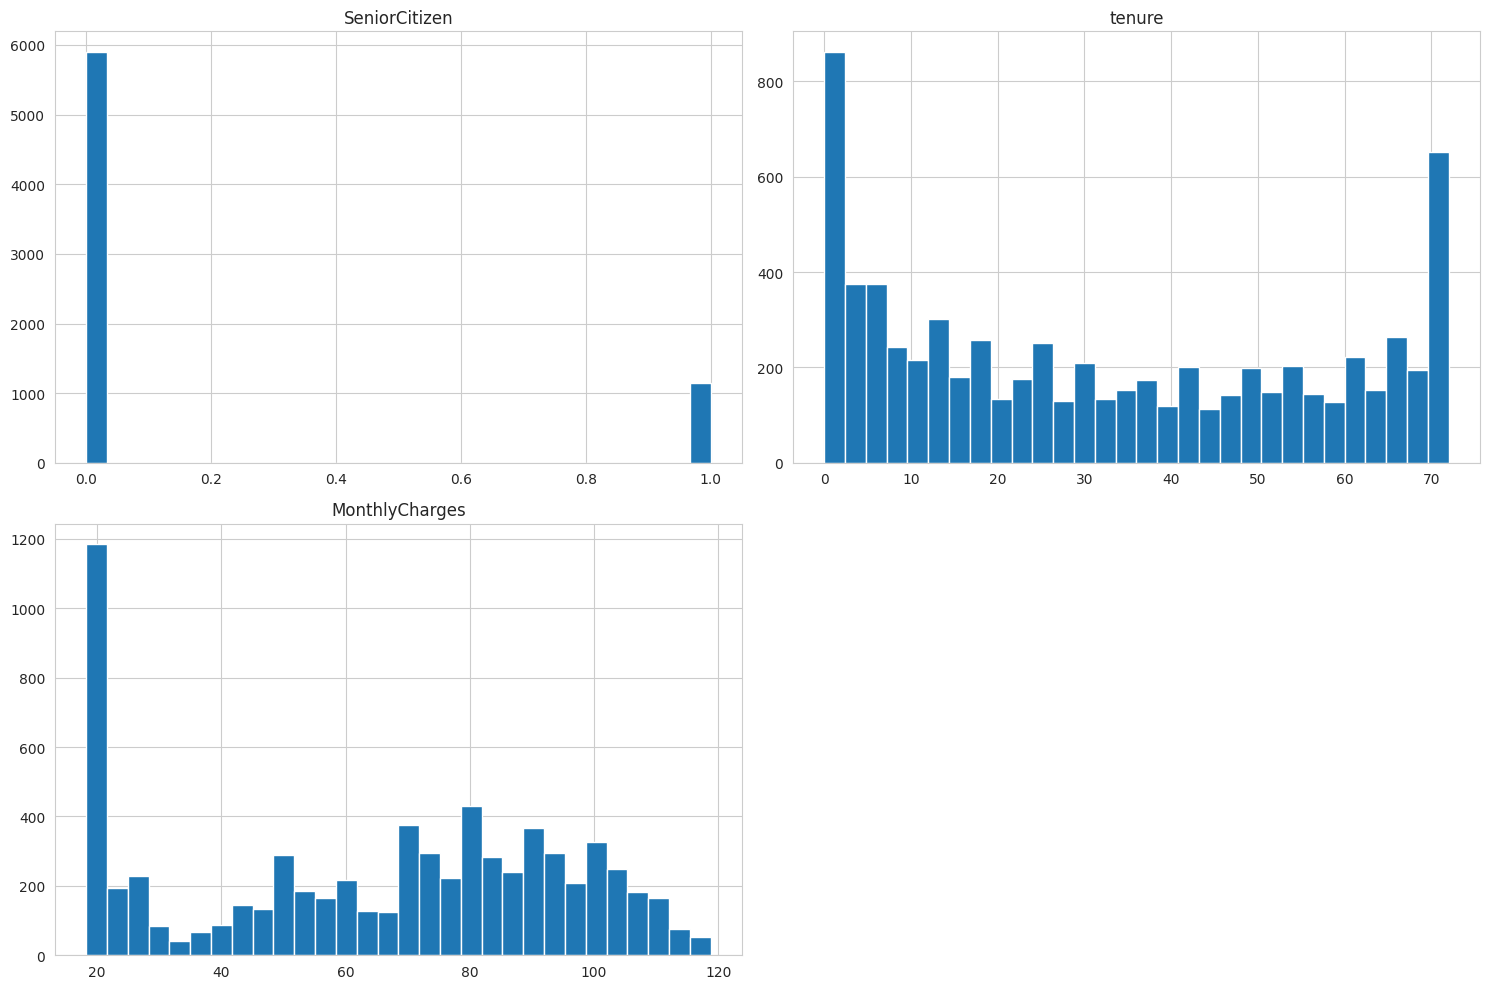

In [9]:
# 8. Análise de variáveis numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

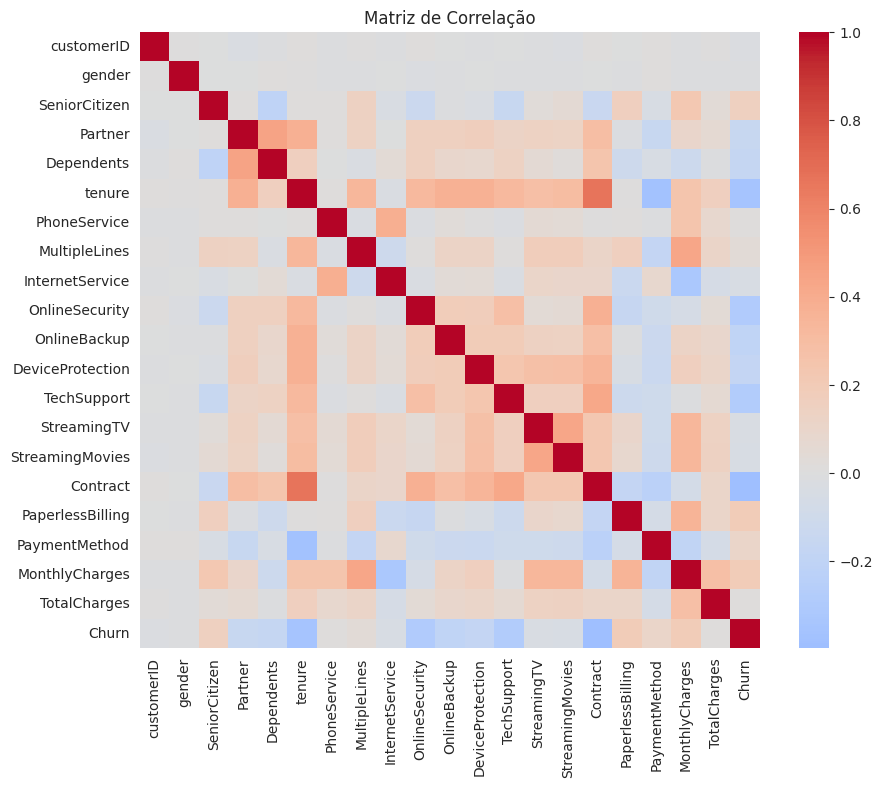

In [10]:
# 9. Correlação
plt.figure(figsize=(10, 8))
# Converter variáveis categóricas para numeric temporariamente
df_numeric = df.copy()
df_numeric['Churn'] = (df_numeric['Churn'] == 'Yes').astype(int)
for col in df_numeric.select_dtypes(include=['object']).columns:
    df_numeric[col] = pd.Categorical(df_numeric[col]).codes

corr = df_numeric.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.show()

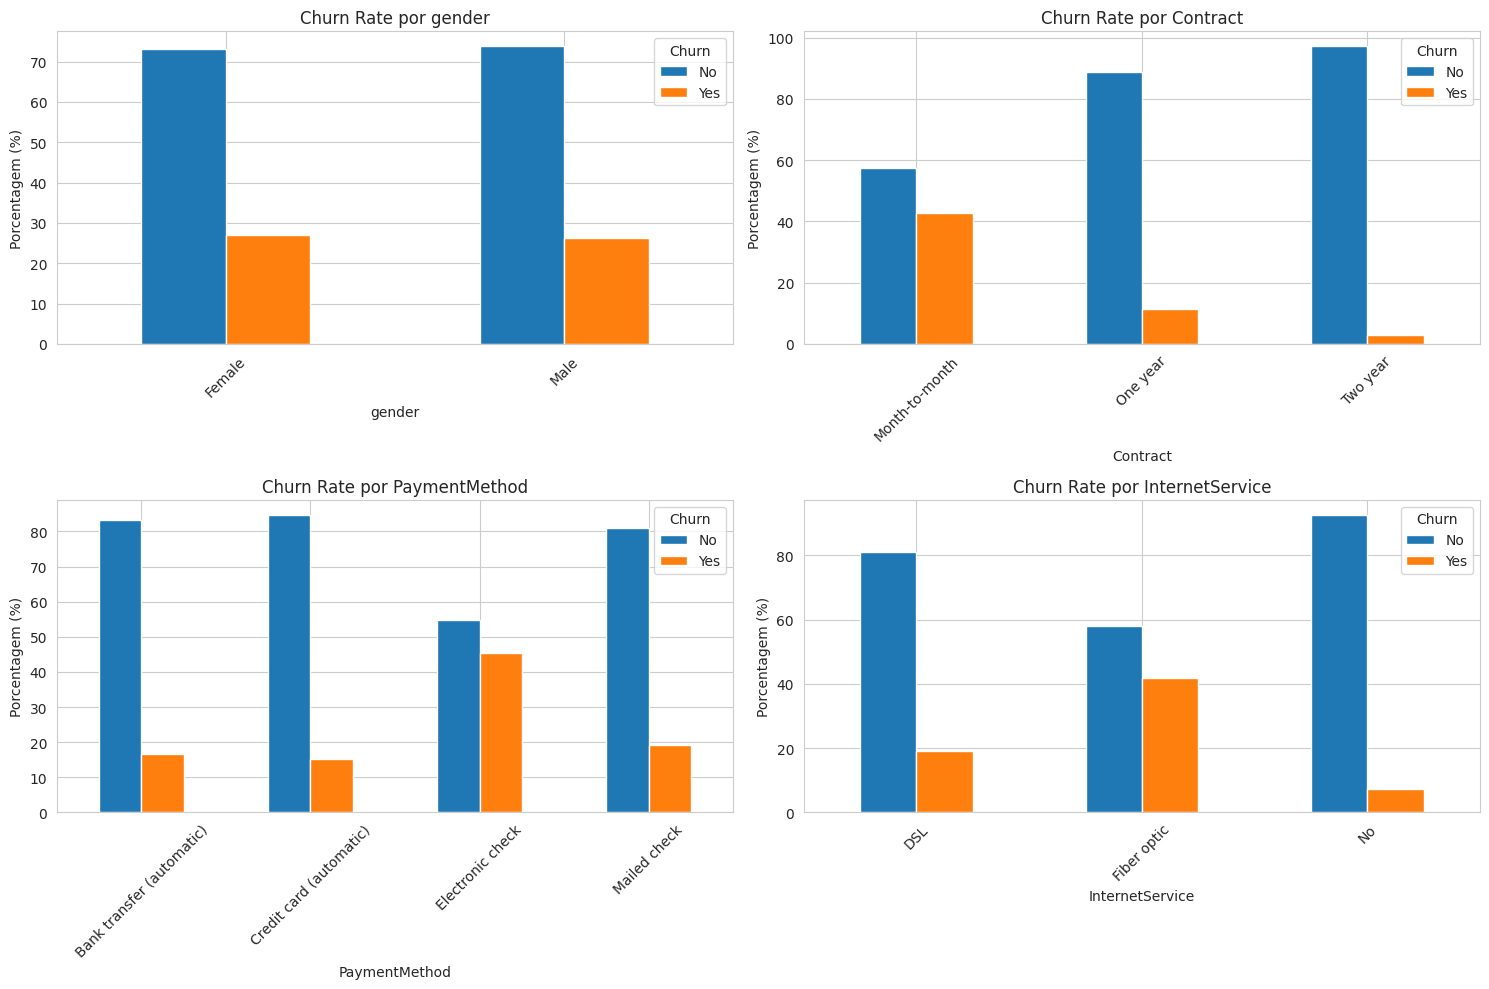

In [11]:
# 10. Churn por variáveis categóricas
categorical_cols = ['gender', 'Contract', 'PaymentMethod', 'InternetService']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols):
    ct = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
    ct.plot(kind='bar', ax=axes[idx], rot=45)
    axes[idx].set_title(f'Churn Rate por {col}')
    axes[idx].set_ylabel('Porcentagem (%)')
    axes[idx].legend(title='Churn')

plt.tight_layout()
plt.show()

In [13]:
# 11. Insights Principais
print("""
📝 INSIGHTS PRINCIPAIS:
====================

1. DISTRIBUIÇÃO TARGET:
   - Taxa de churn: ~26.5%
   - Dados desbalanceados (mais "No" que "Yes")
   - Precisaremos considerar isso no treino

2. VARIÁVEIS NUMÉRICAS:
   - TotalCharges tem alguns valores missing
   - MonthlyCharges varia muito (18-120)
   - Tenure tem boa distribuição

3. VARIÁVEIS CATEGÓRICAS:
   - Contract month-to-month tem muito mais churn
   - Fiber optic tem taxa de churn maior
   - Electronic check tem mais churn

4. PRÓXIMOS PASSOS:
   - Tratar valores missing em TotalCharges
   - Feature engineering: tenure_category, charge_ratio
   - Testar diferentes modelos
   - Balanceamento de classes (SMOTE ou class_weight)
""")


📝 INSIGHTS PRINCIPAIS:

1. DISTRIBUIÇÃO TARGET:
   - Taxa de churn: ~26.5%
   - Dados desbalanceados (mais "No" que "Yes")
   - Precisaremos considerar isso no treino

2. VARIÁVEIS NUMÉRICAS:
   - TotalCharges tem alguns valores missing
   - MonthlyCharges varia muito (18-120)
   - Tenure tem boa distribuição

3. VARIÁVEIS CATEGÓRICAS:
   - Contract month-to-month tem muito mais churn
   - Fiber optic tem taxa de churn maior
   - Electronic check tem mais churn

4. PRÓXIMOS PASSOS:
   - Tratar valores missing em TotalCharges
   - Feature engineering: tenure_category, charge_ratio
   - Testar diferentes modelos
   - Balanceamento de classes (SMOTE ou class_weight)

